<a href="https://colab.research.google.com/github/williamdemeo/cs370-spring2022/blob/master/colab/TF2_0_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to TensorFlow
This is an example text cell.
We can format code like this:
```python
def myFunction:
```
Here's some Scala code (just for illustration---we can't evaluate Scala code in an actual code cell).
```scala
def myFunction(l: List[Int]): Boolean = l.foreach(x => x > 0)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

You could install a specific version like this:
```
!pip install -q tensorflow==2.0.0-beta1
```
Other commands in the console are also available, e.g.,
```
!ls
```

In [7]:
!ls 

sample_data


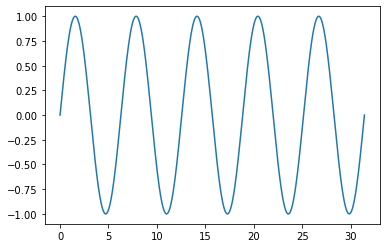

In [2]:
x = np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)
plt.plot(x,y)

In [3]:
!pip install -q tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [5]:
!ls sample_data/

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


## Fetching Data: Method 1

download data from a URL (source: https://archive.ics.uci.edu/ml/datasets/Arrhythmia) 

In [18]:

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

--2022-01-05 01:29:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 402355 (393K) [application/x-httpd-php]
Saving to: ‘arrhythmia.data’

arrhythmia.data     100%[===================>] 392.92K  1.38MB/s    in 0.3s    

2022-01-05 01:29:23 (1.38 MB/s) - ‘arrhythmia.data’ saved [402355/402355]



Check if the arrhythmia data file has a header

In [20]:
!head arrhythmia.data

75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,

Check the data

In [21]:
import pandas as pd
df = pd.read_csv('arrhythmia.data', header=None)

Since the data file has many columns, take just the first few and name them (as per the documentation)

In [22]:
data = df[[0,1,2,3,4,5]]
data.columns = ['age', 'sex', 'height', 'weight', 'QRS duration', 'P-R interval']

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]  # make the plot bigger so the subplots don't overlap
data.hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1fb14a810>,
      dtype=object)

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(data);

## Fetching Data: Method 2

Use keras get_file to download the auto MPG dataset
source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

In [28]:
mpgurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [29]:
# check out the documentation for other arguments
tf.keras.utils.get_file('auto-mpg.data', mpgurl)

40960/30286 [========================================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [30]:
!head /root/.keras/datasets/auto-mpg.data

18.0   8   307.0      130.0      3504.      12.0   70  1	"chevrolet chevelle malibu"
15.0   8   350.0      165.0      3693.      11.5   70  1	"buick skylark 320"
18.0   8   318.0      150.0      3436.      11.0   70  1	"plymouth satellite"
16.0   8   304.0      150.0      3433.      12.0   70  1	"amc rebel sst"
17.0   8   302.0      140.0      3449.      10.5   70  1	"ford torino"
15.0   8   429.0      198.0      4341.      10.0   70  1	"ford galaxie 500"
14.0   8   454.0      220.0      4354.       9.0   70  1	"chevrolet impala"
14.0   8   440.0      215.0      4312.       8.5   70  1	"plymouth fury iii"
14.0   8   455.0      225.0      4425.      10.0   70  1	"pontiac catalina"
15.0   8   390.0      190.0      3850.       8.5   70  1	"amc ambassador dpl"


Note that this is whitespace separated (not comma separated) so we need an extra argument to the pandas read_csv function.

In [31]:
df = pd.read_csv('/root/.keras/datasets/auto-mpg.data', header = None, delim_whitespace=True)
df.head()

0  1      2      3       4     5   6  7                          8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  chevrolet chevelle malibu
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          buick skylark 320
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         plymouth satellite
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              amc rebel sst
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                ford torino

## Fetching Data: Method 3

Upload the data file yourself

In [32]:
from google.colab import files
uploaded = files.upload()

## Fetching Data: Method 4

connect your google drive

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now check that gdrive appears in the current directory.

In [ ]:
!ls gdrive/MyDrive